
---

## Проект 1

### Сопоставительный анализ простых и сложных ансамблей архитектур нейронных сетей для решения задачи регрессии.

### Этап 3. Обучение комплексных моделей

### Цели и задачи этапа

Обучение нескольких комплексных "Wide & Deep" полносвязанный нейронных сетей используя functional API Tensorflow.

### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

Init Plugin
Init Graph Optimizer
Init Kernel


## IMPORT DATA
---

In [2]:
data_path = r'/Users/rttrif/Data_Science_Projects/Internship_MindSet/Project_1_Regression_task'

In [3]:
# Read X_train
X_train = pd.read_csv(data_path + '/X_train.csv')
X_train.head()

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0.084200,236.878667,10.953333,0.0,36.966667,0.600000
1,0.232600,239.185000,4.173333,0.0,0.000000,8.433333
2,0.138600,244.615333,1.420000,0.0,0.500000,0.000000
3,0.015800,236.114667,11.366667,8.5,0.000000,17.666667
4,0.079133,240.075667,6.253333,0.0,0.000000,20.433333


In [4]:
# Read X_test
X_test = pd.read_csv(data_path + '/X_test.csv')
X_test.head()

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0.040733,238.253333,11.300000,0.0,0.866667,17.433333
1,0.064333,233.142333,7.660000,0.0,0.333333,16.666667
2,0.058000,242.286667,1.213333,0.0,0.000000,0.633333
3,0.099667,243.178667,1.506667,0.0,0.133333,0.000000
4,0.117733,233.769333,6.026667,0.0,0.366667,0.000000


In [5]:
# Read y_train
y_train = pd.read_csv(data_path + '/y_train.csv')
y_train.head()

,Global_active_power
0,2.572000
1,0.951533
2,0.336667
3,2.684667
4,1.501467


In [6]:
# Read y_test
y_test =  pd.read_csv(data_path + '/y_test.csv')
y_test.head()

,Global_active_power
0,2.693333
1,1.794067
2,0.265600
3,0.346267
4,1.407400


### Normalize data

In [7]:
# scaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [8]:
# Normalize X_train
X_train_norm = scaler.fit_transform(X_train)
print(X_train.shape)

(47840, 6)


In [9]:
X_train_norm

array([[0.10669933, 0.4204013 , 0.333611  , 0.        , 0.65427729,
        0.02524544],
       [0.29475374, 0.50663011, 0.12182424, 0.        , 0.        ,
        0.35483871],
       [0.17563572, 0.70965852, 0.03581841, 0.        , 0.00884956,
        0.        ],
       ...,
       [0.06023486, 0.71335992, 0.03061224, 0.        , 0.        ,
        0.02805049],
       [0.16684971, 0.76855683, 0.03456893, 0.        , 0.        ,
        0.        ],
       [0.45146574, 0.31360917, 0.4606414 , 0.26985797, 0.        ,
        0.        ]])

In [10]:
# Normalize X_test
X_test_norm = scaler.fit_transform(X_test)
print(X_test.shape)

(20484, 6)


In [11]:
X_test_norm

array([[0.05737089, 0.46502294, 0.32828987, 0.        , 0.01424658,
        0.74395448],
       [0.09061033, 0.26520799, 0.21958989, 0.        , 0.00547945,
        0.71123755],
       [0.08169014, 0.62270642, 0.02707545, 0.        , 0.        ,
        0.02702703],
       ...,
       [0.08873239, 0.5500417 , 0.05853076, 0.        , 0.        ,
        0.07965861],
       [0.20065728, 0.46528357, 0.49253434, 0.        , 0.01150685,
        0.74110953],
       [0.13915493, 0.49091691, 0.49930321, 0.        , 0.47780822,
        0.18918919]])

## Trainnig complex ANN

### Model_6a <a name="Model_6a"></a>

Metal device set to: Apple M1
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 64)           448         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          8320        dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 256)          33024       dense_1[0][0]                    
________________________________________________________________

2021-09-03 18:48:54.254500: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-09-03 18:48:54.254583: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


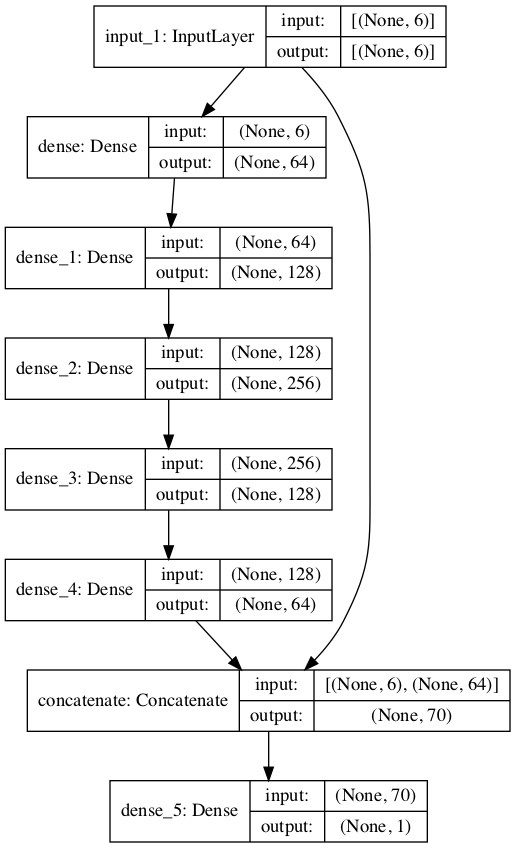

In [12]:
# Model_6a

input = Input(shape = (6,))

hidden_1 =  Dense(64, activation='relu')(input)
hidden_2 =  Dense(128, activation='relu')(hidden_1)
hidden_3 =  Dense(256, activation='relu')(hidden_2)
hidden_4 =  Dense(128, activation='relu')(hidden_3)
hidden_5 =  Dense(64, activation='relu')(hidden_4)

concat = Concatenate()([input, hidden_5])

output = Dense(1, activation='linear')(concat)
model_6a = Model(input, output)

model_6a.compile(optimizer='Adam',
                 loss='mse',
                 metrics=['mae'])

model_6a.summary()

tf.keras.utils.plot_model(model_6a, show_shapes=True)



In [13]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("model_6a.h5",
                                                   save_best_only=True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)

history_6a = model_6a.fit(X_train_norm, y_train,
                       epochs=200,
                       batch_size=128,
                       verbose=2,
                       validation_split=0.2,
                       callbacks =[checkpoint_cb,early_stopping_cb])

2021-09-03 18:48:54.769073: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-09-03 18:48:54.769264: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-09-03 18:48:54.965918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/200


2021-09-03 18:48:56.450836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


299/299 - 2s - loss: 0.1035 - mae: 0.1243 - val_loss: 6.1426e-04 - val_mae: 0.0166
Epoch 2/200
299/299 - 2s - loss: 6.5686e-04 - mae: 0.0180 - val_loss: 7.4648e-04 - val_mae: 0.0207
Epoch 3/200
299/299 - 2s - loss: 7.2515e-04 - mae: 0.0195 - val_loss: 4.4855e-04 - val_mae: 0.0143
Epoch 4/200
299/299 - 2s - loss: 6.1320e-04 - mae: 0.0176 - val_loss: 3.9073e-04 - val_mae: 0.0132
Epoch 5/200
299/299 - 2s - loss: 6.1168e-04 - mae: 0.0177 - val_loss: 0.0015 - val_mae: 0.0338
Epoch 6/200
299/299 - 2s - loss: 6.0126e-04 - mae: 0.0173 - val_loss: 3.8616e-04 - val_mae: 0.0132
Epoch 7/200
299/299 - 2s - loss: 6.6979e-04 - mae: 0.0182 - val_loss: 4.3464e-04 - val_mae: 0.0142
Epoch 8/200
299/299 - 2s - loss: 5.8302e-04 - mae: 0.0172 - val_loss: 4.2227e-04 - val_mae: 0.0135
Epoch 9/200
299/299 - 2s - loss: 5.0614e-04 - mae: 0.0159 - val_loss: 5.4293e-04 - val_mae: 0.0173
Epoch 10/200
299/299 - 2s - loss: 5.6564e-04 - mae: 0.0170 - val_loss: 4.2000e-04 - val_mae: 0.0142
Epoch 11/200
299/299 - 1s - l

#### Оценка результатов

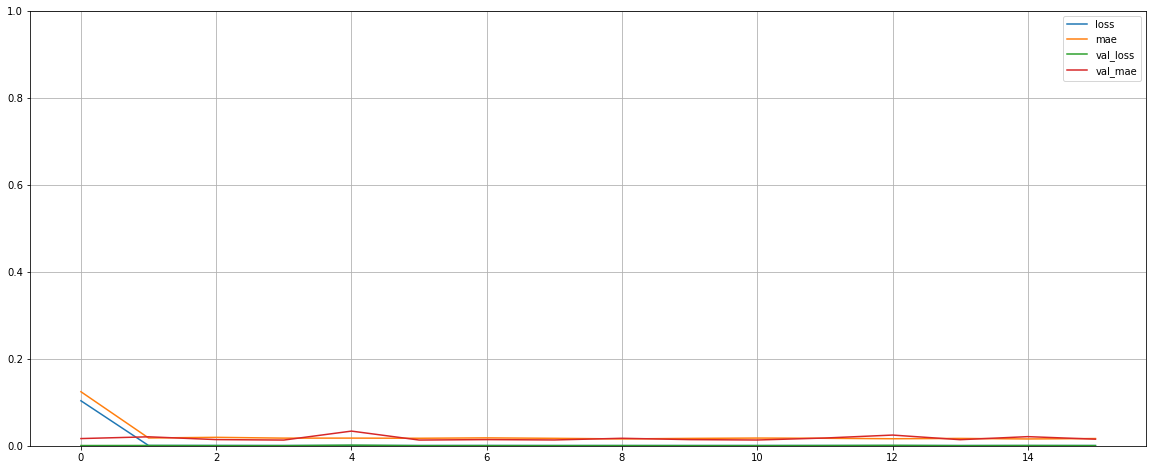

In [14]:
# Learning curves
pd.DataFrame(history_6a.history).plot(figsize=(20, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

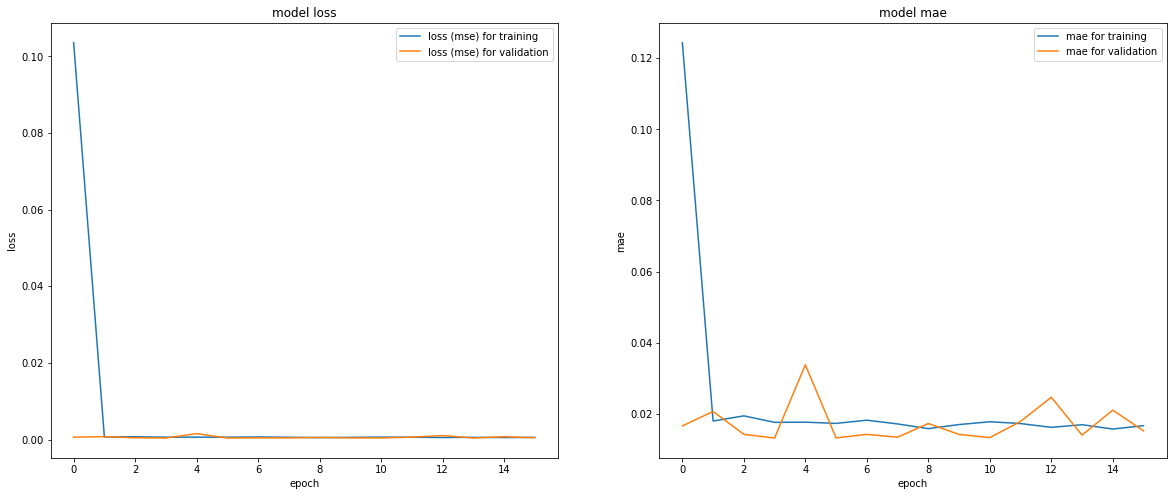

In [15]:
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(20, 8))
axL.plot(history_6a.history['loss'], label="loss (mse) for training")
axL.plot(history_6a.history['val_loss'], label="loss (mse) for validation")
axL.set_title('model loss')
axL.set_xlabel('epoch')
axL.set_ylabel('loss')
axL.legend(loc='upper right')

axR.plot(history_6a.history['mae'], label="mae for training")
axR.plot(history_6a.history['val_mae'], label="mae for validation")
axR.set_title('model mae')
axR.set_xlabel('epoch')
axR.set_ylabel('mae')
axR.legend(loc='upper right')

plt.show()

In [16]:
# Evaluate the model on the test set
evaluate_6a = model_6a.evaluate(X_test, y_test, verbose=2)

2021-09-03 18:49:22.133756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


641/641 - 3s - loss: 6029.4414 - mae: 75.0692


In [17]:
# Predictions
y_preds_train = model_6a.predict(X_train)
y_preds_test = model_6a.predict(X_test)

# calculate root mean squared error
trainScore_6a = math.sqrt(mean_squared_error(y_train, y_preds_train))
print('Train Score: %.2f RMSE' % (trainScore_6a))

testScore_6a = math.sqrt(mean_squared_error(y_test, y_preds_test))
print('Test Score: %.2f RMSE' % (testScore_6a))

2021-09-03 18:49:24.665361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-09-03 18:49:27.573004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Train Score: 77.60 RMSE
Test Score: 77.65 RMSE


---

### Model_6b

In [18]:
X_train_A, X_train_B = X_train_norm, X_train_norm
X_test_A, X_test_B = X_test_norm, X_test_norm

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 64)           448         deep_input[0][0]                 
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 128)          8320        dense_6[0][0]                    
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 256)          33024       dense_7[0][0]                    
____________________________________________________________________________________________

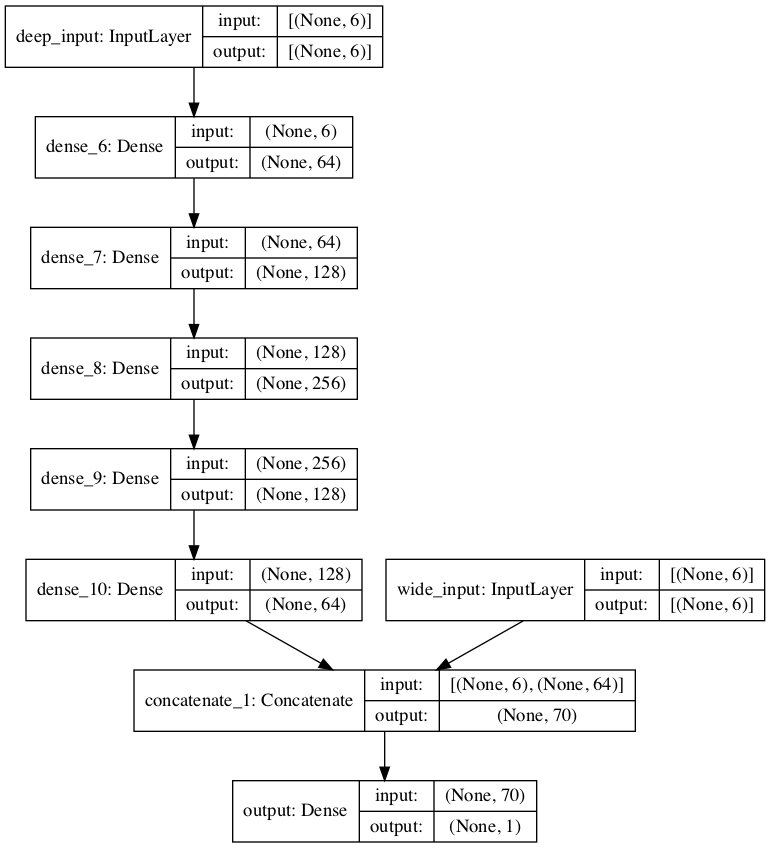

In [19]:
# Model_6b

input_A = Input(shape = (6,),name="wide_input")
input_B = Input(shape = (6,),name="deep_input")

hidden_1 =  Dense(64, activation='relu')(input_B)
hidden_2 =  Dense(128, activation='relu')(hidden_1)
hidden_3 =  Dense(256, activation='relu')(hidden_2)
hidden_4 =  Dense(128, activation='relu')(hidden_3)
hidden_5 =  Dense(64, activation='relu')(hidden_4)

concat = Concatenate()([input_A, hidden_5])

output = Dense(1, activation='linear', name="output")(concat)
model_6b = Model(inputs=[input_A, input_B], outputs=[output])

model_6b.compile(optimizer='Adam',
                 loss='mse',
                 metrics=['mae'])

model_6b.summary()

tf.keras.utils.plot_model(model_6b, show_shapes=True)


In [20]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("model_6b.h5",
                                                   save_best_only=True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)

history_6b = model_6b.fit((X_train_A, X_train_B), y_train,
                       epochs=200,
                       batch_size=128,
                       verbose=2,
                       validation_split=0.2,
                       callbacks =[checkpoint_cb, early_stopping_cb])

Epoch 1/200


2021-09-03 18:49:29.326661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-09-03 18:49:30.735945: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


299/299 - 2s - loss: 0.0960 - mae: 0.1144 - val_loss: 6.7233e-04 - val_mae: 0.0173
Epoch 2/200
299/299 - 2s - loss: 6.6216e-04 - mae: 0.0179 - val_loss: 4.9660e-04 - val_mae: 0.0154
Epoch 3/200
299/299 - 2s - loss: 6.1654e-04 - mae: 0.0175 - val_loss: 4.6311e-04 - val_mae: 0.0150
Epoch 4/200
299/299 - 2s - loss: 5.9549e-04 - mae: 0.0174 - val_loss: 4.1338e-04 - val_mae: 0.0130
Epoch 5/200
299/299 - 2s - loss: 6.9078e-04 - mae: 0.0190 - val_loss: 6.5455e-04 - val_mae: 0.0190
Epoch 6/200
299/299 - 2s - loss: 5.3421e-04 - mae: 0.0163 - val_loss: 5.6165e-04 - val_mae: 0.0175
Epoch 7/200
299/299 - 2s - loss: 5.8138e-04 - mae: 0.0172 - val_loss: 0.0013 - val_mae: 0.0305
Epoch 8/200
299/299 - 2s - loss: 6.2516e-04 - mae: 0.0179 - val_loss: 8.0996e-04 - val_mae: 0.0224
Epoch 9/200
299/299 - 1s - loss: 5.7210e-04 - mae: 0.0170 - val_loss: 3.5679e-04 - val_mae: 0.0126
Epoch 10/200
299/299 - 1s - loss: 4.9801e-04 - mae: 0.0157 - val_loss: 3.8367e-04 - val_mae: 0.0133
Epoch 11/200
299/299 - 1s - l

#### Оценка результатов

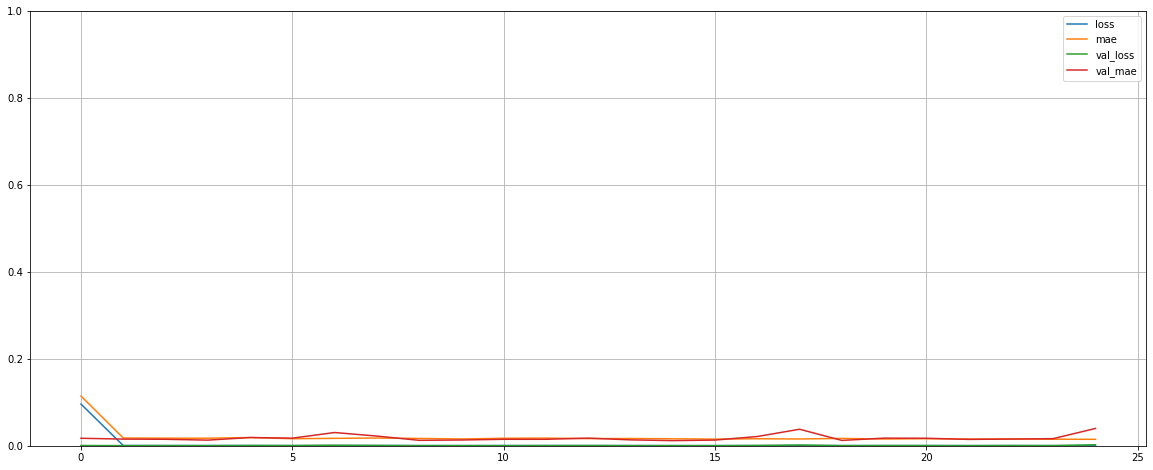

In [21]:
# Learning curves
pd.DataFrame(history_6b.history).plot(figsize=(20, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

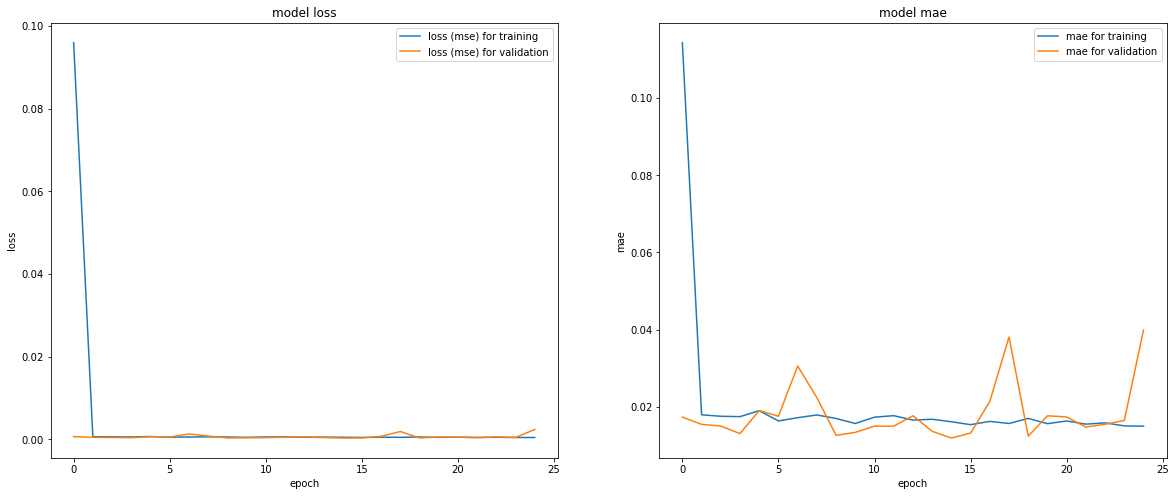

In [22]:
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(20, 8))
axL.plot(history_6b.history['loss'], label="loss (mse) for training")
axL.plot(history_6b.history['val_loss'], label="loss (mse) for validation")
axL.set_title('model loss')
axL.set_xlabel('epoch')
axL.set_ylabel('loss')
axL.legend(loc='upper right')

axR.plot(history_6b.history['mae'], label="mae for training")
axR.plot(history_6b.history['val_mae'], label="mae for validation")
axR.set_title('model mae')
axR.set_xlabel('epoch')
axR.set_ylabel('mae')
axR.legend(loc='upper right')

plt.show()

In [23]:
# Evaluate the model on the test set
evaluate_6b = model_6b.evaluate((X_test_A, X_test_B), y_test, verbose=2)

641/641 - 2s - loss: 0.0054 - mae: 0.0575


In [24]:
# Predictions
y_preds_train = model_6b.predict((X_train_A, X_train_B))
y_preds_test = model_6b.predict((X_test_A, X_test_B))

# calculate root mean squared error
trainScore_6b = math.sqrt(mean_squared_error(y_train, y_preds_train))
print('Train Score: %.2f RMSE' % (trainScore_6b))

testScore_6b = math.sqrt(mean_squared_error(y_test, y_preds_test))
print('Test Score: %.2f RMSE' % (testScore_6b))

2021-09-03 18:50:11.484214: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-09-03 18:50:13.775691: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Train Score: 0.02 RMSE
Test Score: 0.07 RMSE


---

### Model_6с

In [25]:
X_train_A = X_train_norm[:, 0] # Global_reactive_power
X_train_B = X_train_norm[:, 1] # Voltage
X_train_C = X_train_norm[:, 2] # Global_intensity
X_train_D = X_train_norm[:, 3:] # Sub_metering by 1 to 3

X_test_A = X_test_norm[:, 0] # Global_reactive_power
X_test_B = X_test_norm[:, 1] # Voltage
X_test_C = X_test_norm[:, 2] # Global_intensity
X_test_D = X_test_norm[:, 3:] # Sub_metering by 1 to 3

In [26]:
print(X_train_A.shape,X_train_B.shape,X_train_C.shape, X_train_D.shape)
print(X_test_A.shape,X_test_B.shape,X_test_C.shape, X_test_D.shape)

(47840,) (47840,) (47840,) (47840, 3)
(20484,) (20484,) (20484,) (20484, 3)


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input_d (InputLayer)       [(None, 3)]          0                                            
__________________________________________________________________________________________________
dense_26 (Dense)                (None, 64)           256         deep_input_d[0][0]               
__________________________________________________________________________________________________
batch_normalization_5 (BatchNor (None, 64)           256         dense_26[0][0]                   
__________________________________________________________________________________________________
dense_27 (Dense)                (None, 128)          8320        batch_normalization_5[0][0]      
____________________________________________________________________________________________

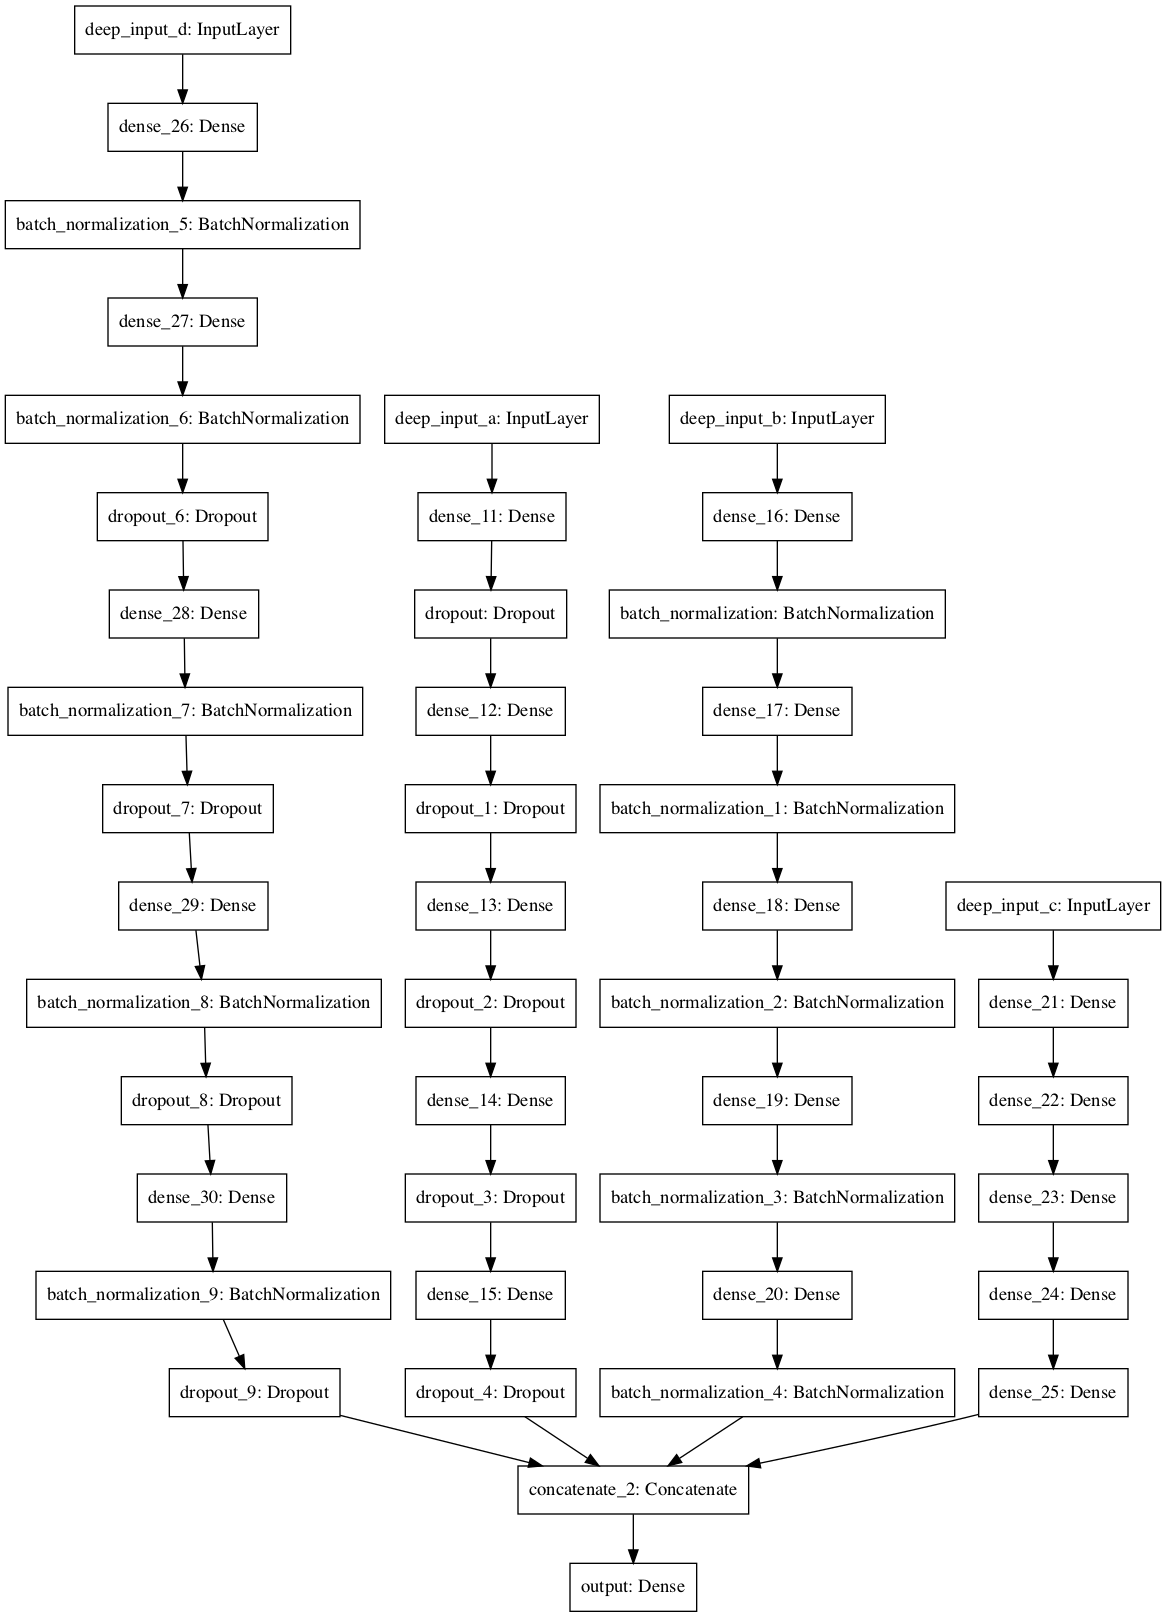

In [27]:
# Model_6с

input_A = Input(shape = (1,),name="deep_input_a") # Global_reactive_power
input_B = Input(shape = (1,),name="deep_input_b") # Voltage
input_C = Input(shape = (1,),name="deep_input_c") # Global_intensity
input_D = Input(shape = (3,),name="deep_input_d") # Sub_metering by 1 to 3

# ANN FOR GLOBAL_REACTIVE_POWER
hidden_1 = Dense(64, activation='relu')(input_A)
dropout =  Dropout(rate=0.1)(hidden_1)

hidden_2 = Dense(128, activation='relu')(dropout)
dropout =  Dropout(rate=0.2)(hidden_2)

hidden_3 = Dense(256, activation='relu')(dropout)
dropout =  Dropout(rate=0.3)(hidden_3)

hidden_4 = Dense(128, activation='relu')(dropout)
dropout =  Dropout(rate=0.2)(hidden_4)

hidden_5 = Dense(64, activation='relu')(dropout)
out_submodel_a =  Dropout(rate=0.1)(hidden_5)

# ANN FOR VOLTAGE
hidden_1 = Dense(64, activation='relu')(input_B)
bach_norm =  BatchNormalization()(hidden_1)

hidden_2 = Dense(128, activation='relu')(bach_norm)
bach_norm =  BatchNormalization()(hidden_2)

hidden_3 = Dense(256, activation='relu')(bach_norm)
bach_norm =  BatchNormalization()(hidden_3)

hidden_4 = Dense(128, activation='relu')(bach_norm)
bach_norm =  BatchNormalization()(hidden_4)

hidden_5 = Dense(64, activation='relu')(bach_norm)
out_submodel_b =  BatchNormalization()(hidden_5)

# ANN FOR GLOBAL_INTENSITY
from functools import partial
RegularizedDense = partial(tf.keras.layers.Dense,
                           activation="relu",
                           kernel_initializer="he_normal",
                           kernel_constraint=tf.keras.constraints.max_norm(1.))

hidden_1 =  RegularizedDense(64)(input_C)
hidden_2 =  RegularizedDense(128)(hidden_1)
hidden_3 =  RegularizedDense(256)(hidden_2)
hidden_4 =  RegularizedDense(128)(hidden_3)
out_submodel_c =  RegularizedDense(64)(hidden_4)

# ANN FOR SUB_METERING BY 1 TO 3
from functools import partial
RegularizedDense = partial(tf.keras.layers.Dense,
                           activation="relu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=tf.keras.regularizers.l1_l2(0.01))

hidden_1 =  RegularizedDense(64)(input_D)
bach_norm =  BatchNormalization()(hidden_1)
dropout =  Dropout(rate=0.1)(bach_norm)

hidden_2 =  RegularizedDense(128)(bach_norm)
bach_norm =  BatchNormalization()(hidden_2)
dropout =  Dropout(rate=0.1)(bach_norm)

hidden_3 =  RegularizedDense(256)(dropout)
bach_norm =  BatchNormalization()(hidden_3)
dropout =  Dropout(rate=0.1)(bach_norm)

hidden_4 =  RegularizedDense(128)(dropout)
bach_norm =  BatchNormalization()(hidden_4)
dropout =  Dropout(rate=0.1)(bach_norm)


hidden_5 =  RegularizedDense(64)(dropout)
bach_norm =  BatchNormalization()(hidden_5)
out_submodel_d =  Dropout(rate=0.1)(bach_norm)


concat = Concatenate()([out_submodel_a, out_submodel_b, out_submodel_c, out_submodel_d])

output = Dense(1, activation='linear', name="output")(concat)
model_6c = Model(inputs=[input_A, input_B, input_C, input_D], outputs=[output])

model_6c.compile(optimizer='Adam',
                 loss='mse',
                 metrics=['mae'])

model_6c.summary()

tf.keras.utils.plot_model(model_6c)


In [28]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("model_6c.h5",
                                                   save_best_only=True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)

history_6c = model_6c.fit((X_train_A, X_train_B,X_train_C, X_train_D), y_train,
                       epochs=200,
                       batch_size=128,
                       verbose=2,
                       validation_split=0.2,
                       callbacks =[checkpoint_cb, early_stopping_cb])

Epoch 1/200


2021-09-03 18:50:16.310738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-09-03 18:50:26.392362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


299/299 - 12s - loss: 31.9756 - mae: 0.2204 - val_loss: 4.3988 - val_mae: 0.1226
Epoch 2/200
299/299 - 10s - loss: 1.9866 - mae: 0.0363 - val_loss: 1.1182 - val_mae: 0.0456
Epoch 3/200
299/299 - 10s - loss: 0.8356 - mae: 0.0229 - val_loss: 0.6080 - val_mae: 0.0271
Epoch 4/200
299/299 - 10s - loss: 0.4605 - mae: 0.0211 - val_loss: 0.3386 - val_mae: 0.0233
Epoch 5/200
299/299 - 11s - loss: 0.2566 - mae: 0.0214 - val_loss: 0.1906 - val_mae: 0.0308
Epoch 6/200
299/299 - 11s - loss: 0.1497 - mae: 0.0215 - val_loss: 0.1229 - val_mae: 0.0394
Epoch 7/200
299/299 - 10s - loss: 0.1078 - mae: 0.0205 - val_loss: 0.1001 - val_mae: 0.0402
Epoch 8/200
299/299 - 11s - loss: 0.0939 - mae: 0.0210 - val_loss: 0.0918 - val_mae: 0.0248
Epoch 9/200
299/299 - 12s - loss: 0.0927 - mae: 0.0214 - val_loss: 0.0934 - val_mae: 0.0230
Epoch 10/200
299/299 - 11s - loss: 0.0940 - mae: 0.0213 - val_loss: 0.0952 - val_mae: 0.0320
Epoch 11/200
299/299 - 11s - loss: 0.0945 - mae: 0.0225 - val_loss: 0.0955 - val_mae: 0.03

#### Оценка результатов

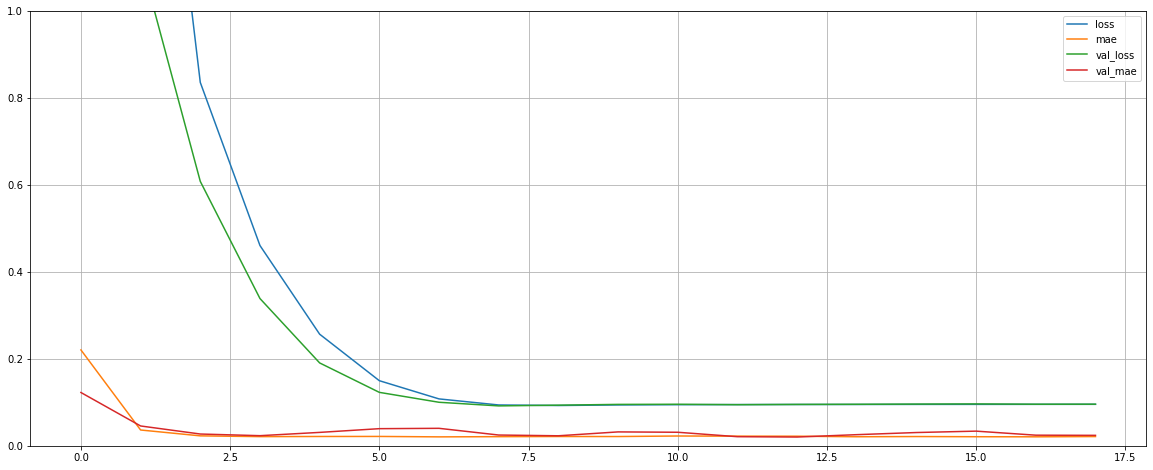

In [29]:
# Learning curves
pd.DataFrame(history_6c.history).plot(figsize=(20, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

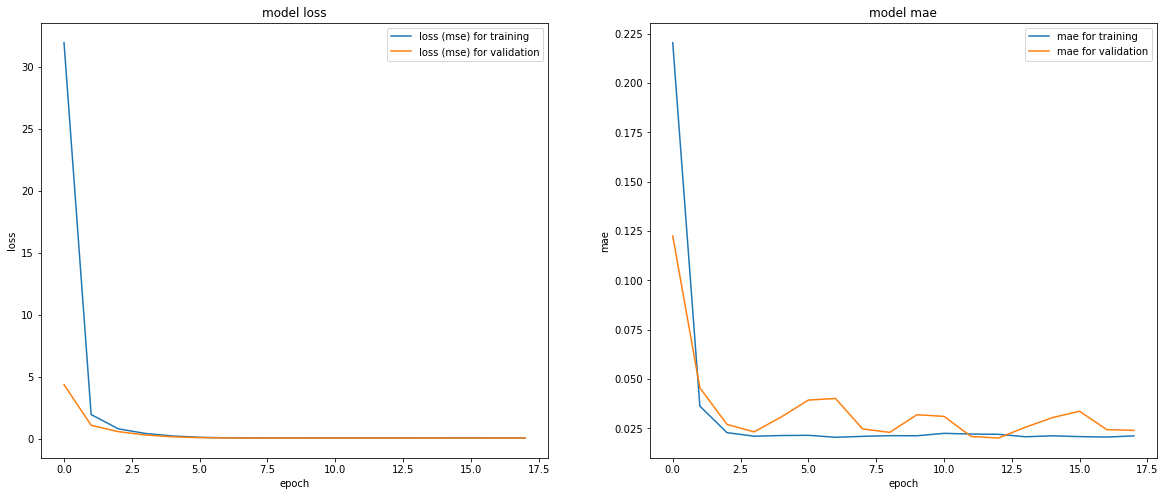

In [30]:
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(20, 8))
axL.plot(history_6c.history['loss'], label="loss (mse) for training")
axL.plot(history_6c.history['val_loss'], label="loss (mse) for validation")
axL.set_title('model loss')
axL.set_xlabel('epoch')
axL.set_ylabel('loss')
axL.legend(loc='upper right')

axR.plot(history_6c.history['mae'], label="mae for training")
axR.plot(history_6c.history['val_mae'], label="mae for validation")
axR.set_title('model mae')
axR.set_xlabel('epoch')
axR.set_ylabel('mae')
axR.legend(loc='upper right')

plt.show()

In [31]:
# Evaluate the model on the test set
evaluate_6c = model_6c.evaluate((X_test_A, X_test_B, X_test_C, X_test_D), y_test, verbose=2)

641/641 - 6s - loss: 0.0965 - mae: 0.0576


In [32]:
# Predictions
y_preds_train = model_6c.predict((X_train_A, X_train_B, X_train_C, X_train_D))
y_preds_test = model_6c.predict((X_test_A, X_test_B, X_test_C, X_test_D))

# calculate root mean squared error
trainScore_6c = math.sqrt(mean_squared_error(y_train, y_preds_train))
print('Train Score: %.2f RMSE' % (trainScore_6c))

testScore_6c = math.sqrt(mean_squared_error(y_test, y_preds_test))
print('Test Score: %.2f RMSE' % (testScore_6c))

2021-09-03 18:53:40.461152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-09-03 18:53:50.267805: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Train Score: 0.03 RMSE
Test Score: 0.08 RMSE


---

### Model_6d

In [33]:
X_train_A = X_train_norm[:, :3]  # Global_reactive_power + Voltage + Global_intensity
X_train_B = X_train_norm[:, 3:]  # Sub_metering by 1 to 3

X_test_A = X_test_norm[:, :3]  # Global_reactive_power + Voltage + Global_intensity
X_test_B = X_test_norm[:, 3:]  # Sub_metering by 1 to 3

print(X_train_A.shape, X_train_B.shape)
print(X_test_A.shape, X_test_B.shape)

(47840, 3) (47840, 3)
(20484, 3) (20484, 3)


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input_a (InputLayer)       [(None, 3)]          0                                            
__________________________________________________________________________________________________
dense_31 (Dense)                (None, 64)           256         deep_input_a[0][0]               
__________________________________________________________________________________________________
batch_normalization_10 (BatchNo (None, 64)           256         dense_31[0][0]                   
__________________________________________________________________________________________________
dropout_10 (Dropout)            (None, 64)           0           batch_normalization_10[0][0]     
____________________________________________________________________________________________

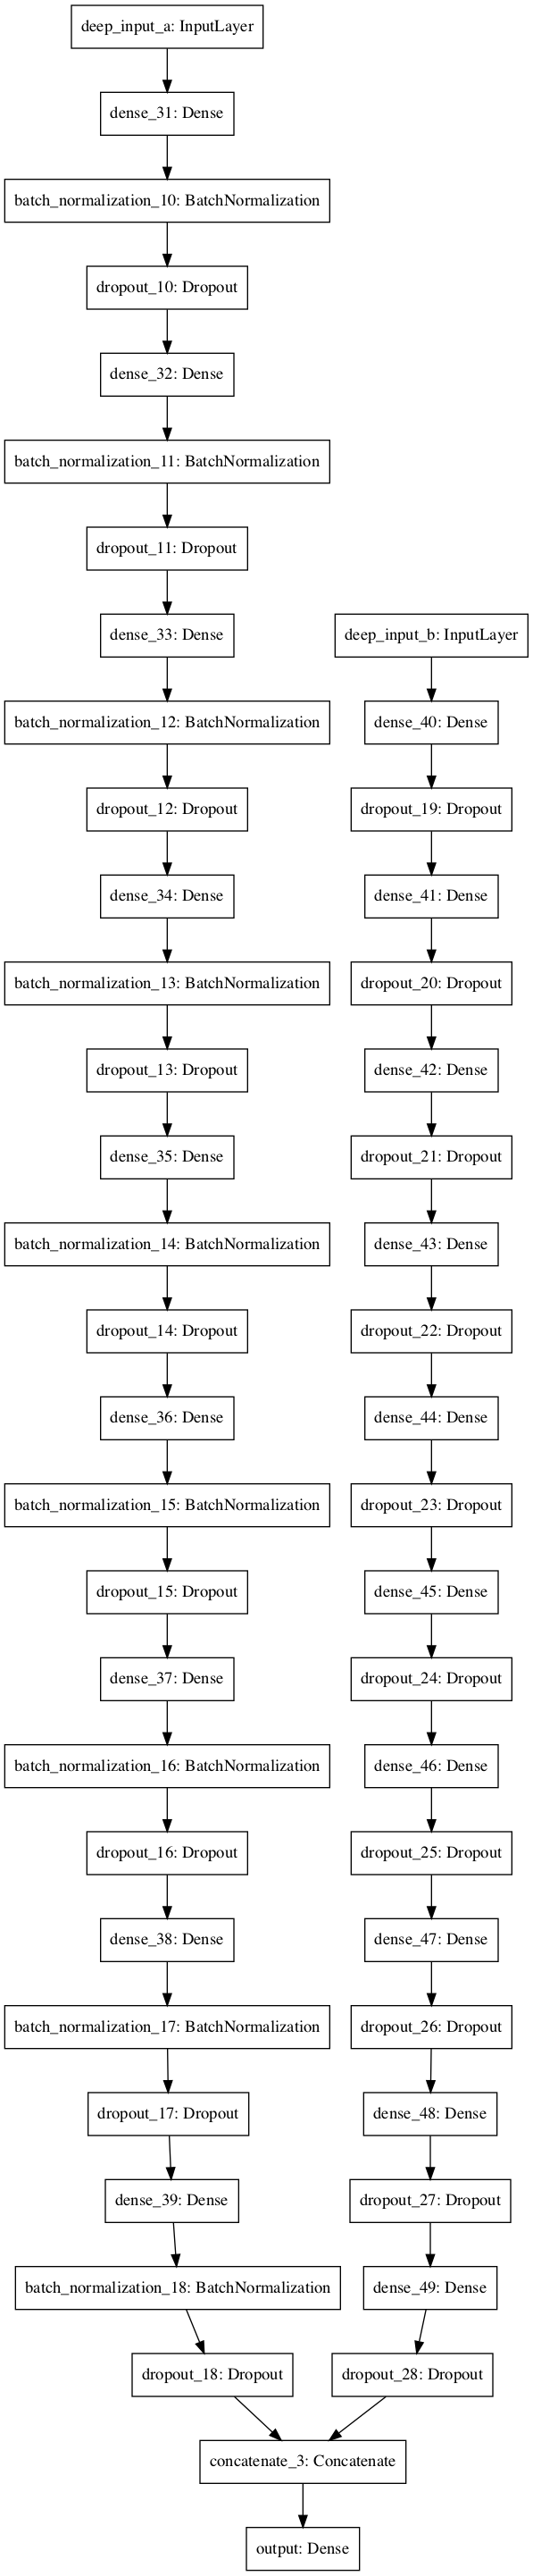

In [34]:
# Model_6d

input_A = Input(shape = (3,),name="deep_input_a") # Global_reactive_power + Voltage + Global_intensity
input_B = Input(shape = (3,),name="deep_input_b") # Sub_metering by 1 to 3

# ANN SUBMODEL A
hidden_1 = Dense(64, activation='relu')(input_A)
bach_norm =  BatchNormalization()(hidden_1)
dropout =  Dropout(rate=0.1)(bach_norm)

hidden_2 = Dense(128, activation='relu')(dropout)
bach_norm =  BatchNormalization()(hidden_2)
dropout =  Dropout(rate=0.2)(bach_norm)

hidden_3 = Dense(256, activation='relu')(dropout)
bach_norm =  BatchNormalization()(hidden_3)
dropout =  Dropout(rate=0.3)(bach_norm)

hidden_4 = Dense(512, activation='relu')(dropout)
bach_norm =  BatchNormalization()(hidden_4)
dropout =  Dropout(rate=0.4)(bach_norm)

hidden_5 = Dense(1024, activation='relu')(dropout)
bach_norm =  BatchNormalization()(hidden_5)
dropout =  Dropout(rate=0.5)(bach_norm)

hidden_6 = Dense(512, activation='relu')(dropout)
bach_norm =  BatchNormalization()(hidden_6)
dropout =  Dropout(rate=0.4)(bach_norm)

hidden_7 = Dense(256, activation='relu')(dropout)
bach_norm =  BatchNormalization()(hidden_7)
dropout =  Dropout(rate=0.3)(bach_norm)

hidden_8 = Dense(128, activation='relu')(dropout)
bach_norm =  BatchNormalization()(hidden_8)
dropout =  Dropout(rate=0.2)(bach_norm)

hidden_9 = Dense(64, activation='relu')(dropout)
bach_norm =  BatchNormalization()(hidden_9)
out_submodel_a =  Dropout(rate=0.1)(bach_norm)


# ANN SUBMODEL B
from functools import partial
RegularizedDense = partial(tf.keras.layers.Dense,
                           activation="relu",
                           kernel_initializer="he_normal",
                           kernel_constraint=tf.keras.constraints.max_norm(1.),
                           kernel_regularizer=tf.keras.regularizers.l1_l2(0.01))

hidden_1 =  RegularizedDense(64)(input_B)
dropout =  Dropout(rate=0.1)(hidden_1)

hidden_2 =  RegularizedDense(128)(dropout )
dropout =  Dropout(rate=0.2)(hidden_2)

hidden_3 =  RegularizedDense(256)(dropout )
dropout =  Dropout(rate=0.3)(hidden_3)

hidden_4 =  RegularizedDense(256)(dropout )
dropout =  Dropout(rate=0.3)(hidden_4)

hidden_5 =  RegularizedDense(512)(dropout )
dropout =  Dropout(rate=0.4)(hidden_5)

hidden_6 =  RegularizedDense(512)(dropout )
dropout =  Dropout(rate=0.4)(hidden_6)

hidden_7 =  RegularizedDense(256)(dropout )
dropout =  Dropout(rate=0.3)(hidden_7)

hidden_8 =  RegularizedDense(256)(dropout )
dropout =  Dropout(rate=0.3)(hidden_8)

hidden_9 =  RegularizedDense(128)(dropout )
dropout =  Dropout(rate=0.2)(hidden_9)

hidden_10 =  RegularizedDense(64)(dropout )
out_submodel_b =  Dropout(rate=0.1)(hidden_10)


concat = Concatenate()([out_submodel_a, out_submodel_b])

output = Dense(1, activation='linear', name="output")(concat)
model_6d = Model(inputs=[input_A, input_B], outputs=[output])

model_6d.compile(optimizer='Adam',
                 loss='mse',
                 metrics=['mae'])

model_6d.summary()

tf.keras.utils.plot_model(model_6d)


In [35]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("model_6d.h5",
                                                   save_best_only=True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)

history_6d = model_6d.fit((X_train_A, X_train_B), y_train,
                       epochs=200,
                       batch_size=128,
                       verbose=2,
                       validation_split=0.2,
                       callbacks =[checkpoint_cb, early_stopping_cb])

Epoch 1/200


2021-09-03 18:53:56.367194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-09-03 18:54:11.664253: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


299/299 - 17s - loss: 57.7539 - mae: 0.4163 - val_loss: 3.0331 - val_mae: 0.6713
Epoch 2/200
299/299 - 15s - loss: 1.6523 - mae: 0.2192 - val_loss: 1.2980 - val_mae: 0.2364
Epoch 3/200
299/299 - 15s - loss: 1.1198 - mae: 0.1841 - val_loss: 0.9642 - val_mae: 0.0841
Epoch 4/200
299/299 - 15s - loss: 0.9760 - mae: 0.1694 - val_loss: 0.9152 - val_mae: 0.1060
Epoch 5/200
299/299 - 15s - loss: 0.9487 - mae: 0.1599 - val_loss: 0.8975 - val_mae: 0.0765
Epoch 6/200
299/299 - 16s - loss: 0.9367 - mae: 0.1523 - val_loss: 0.9046 - val_mae: 0.0807
Epoch 7/200
299/299 - 16s - loss: 0.9415 - mae: 0.1484 - val_loss: 0.9173 - val_mae: 0.0993
Epoch 8/200
299/299 - 17s - loss: 0.9517 - mae: 0.1407 - val_loss: 0.9322 - val_mae: 0.0924
Epoch 9/200
299/299 - 16s - loss: 0.9566 - mae: 0.1372 - val_loss: 0.9246 - val_mae: 0.0612
Epoch 10/200
299/299 - 15s - loss: 0.9594 - mae: 0.1390 - val_loss: 0.9252 - val_mae: 0.0849
Epoch 11/200
299/299 - 15s - loss: 0.9576 - mae: 0.1354 - val_loss: 0.9275 - val_mae: 0.06

#### Оценка результатов

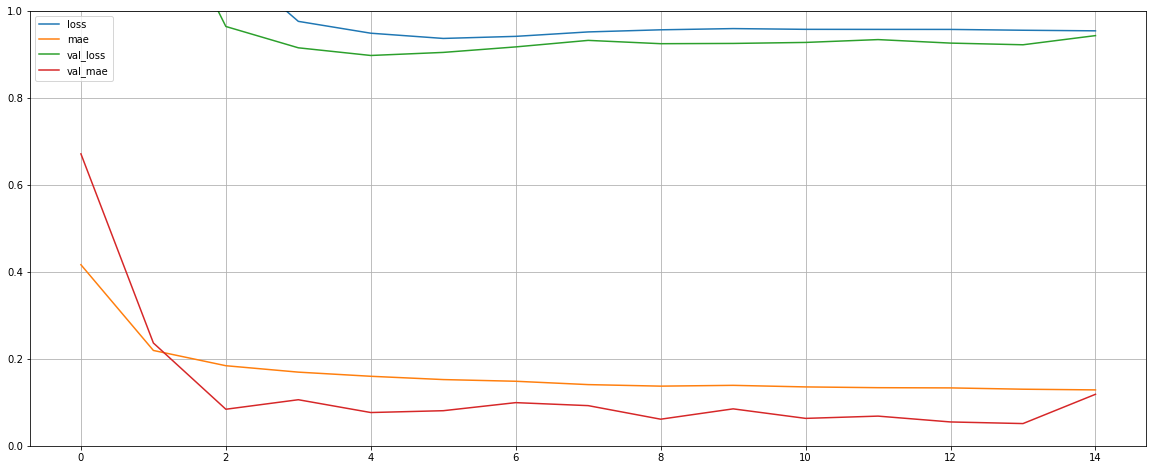

In [36]:
# Learning curves
pd.DataFrame(history_6d.history).plot(figsize=(20, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

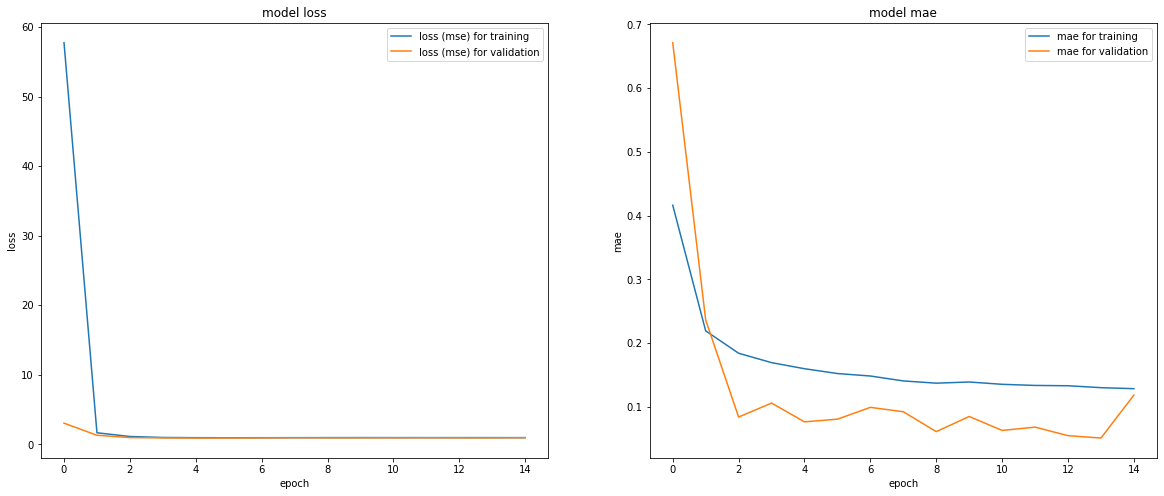

In [37]:
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(20, 8))
axL.plot(history_6d.history['loss'], label="loss (mse) for training")
axL.plot(history_6d.history['val_loss'], label="loss (mse) for validation")
axL.set_title('model loss')
axL.set_xlabel('epoch')
axL.set_ylabel('loss')
axL.legend(loc='upper right')

axR.plot(history_6d.history['mae'], label="mae for training")
axR.plot(history_6d.history['val_mae'], label="mae for validation")
axR.set_title('model mae')
axR.set_xlabel('epoch')
axR.set_ylabel('mae')
axR.legend(loc='upper right')

plt.show()

In [38]:
# Evaluate the model on the test set
evaluate_6d = model_6d.evaluate((X_test_A, X_test_B), y_test, verbose=2)

641/641 - 7s - loss: 0.9113 - mae: 0.1233


In [39]:
# Predictions
y_preds_train = model_6d.predict((X_train_A, X_train_B))
y_preds_test = model_6d.predict((X_test_A, X_test_B))

# calculate root mean squared error
trainScore_6d = math.sqrt(mean_squared_error(y_train, y_preds_train))
print('Train Score: %.2f RMSE' % (trainScore_6d))

testScore_6d = math.sqrt(mean_squared_error(y_test, y_preds_test))
print('Test Score: %.2f RMSE' % (testScore_6d))

2021-09-03 18:57:58.348036: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-09-03 18:58:07.150413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Train Score: 0.10 RMSE
Test Score: 0.15 RMSE


---

### Model_6e <a name="Model_6e"></a>

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_50 (Dense)                (None, 64)           448         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_19 (BatchNo (None, 64)           256         dense_50[0][0]                   
__________________________________________________________________________________________________
dropout_29 (Dropout)            (None, 64)           0           batch_normalization_19[0][0]     
____________________________________________________________________________________________

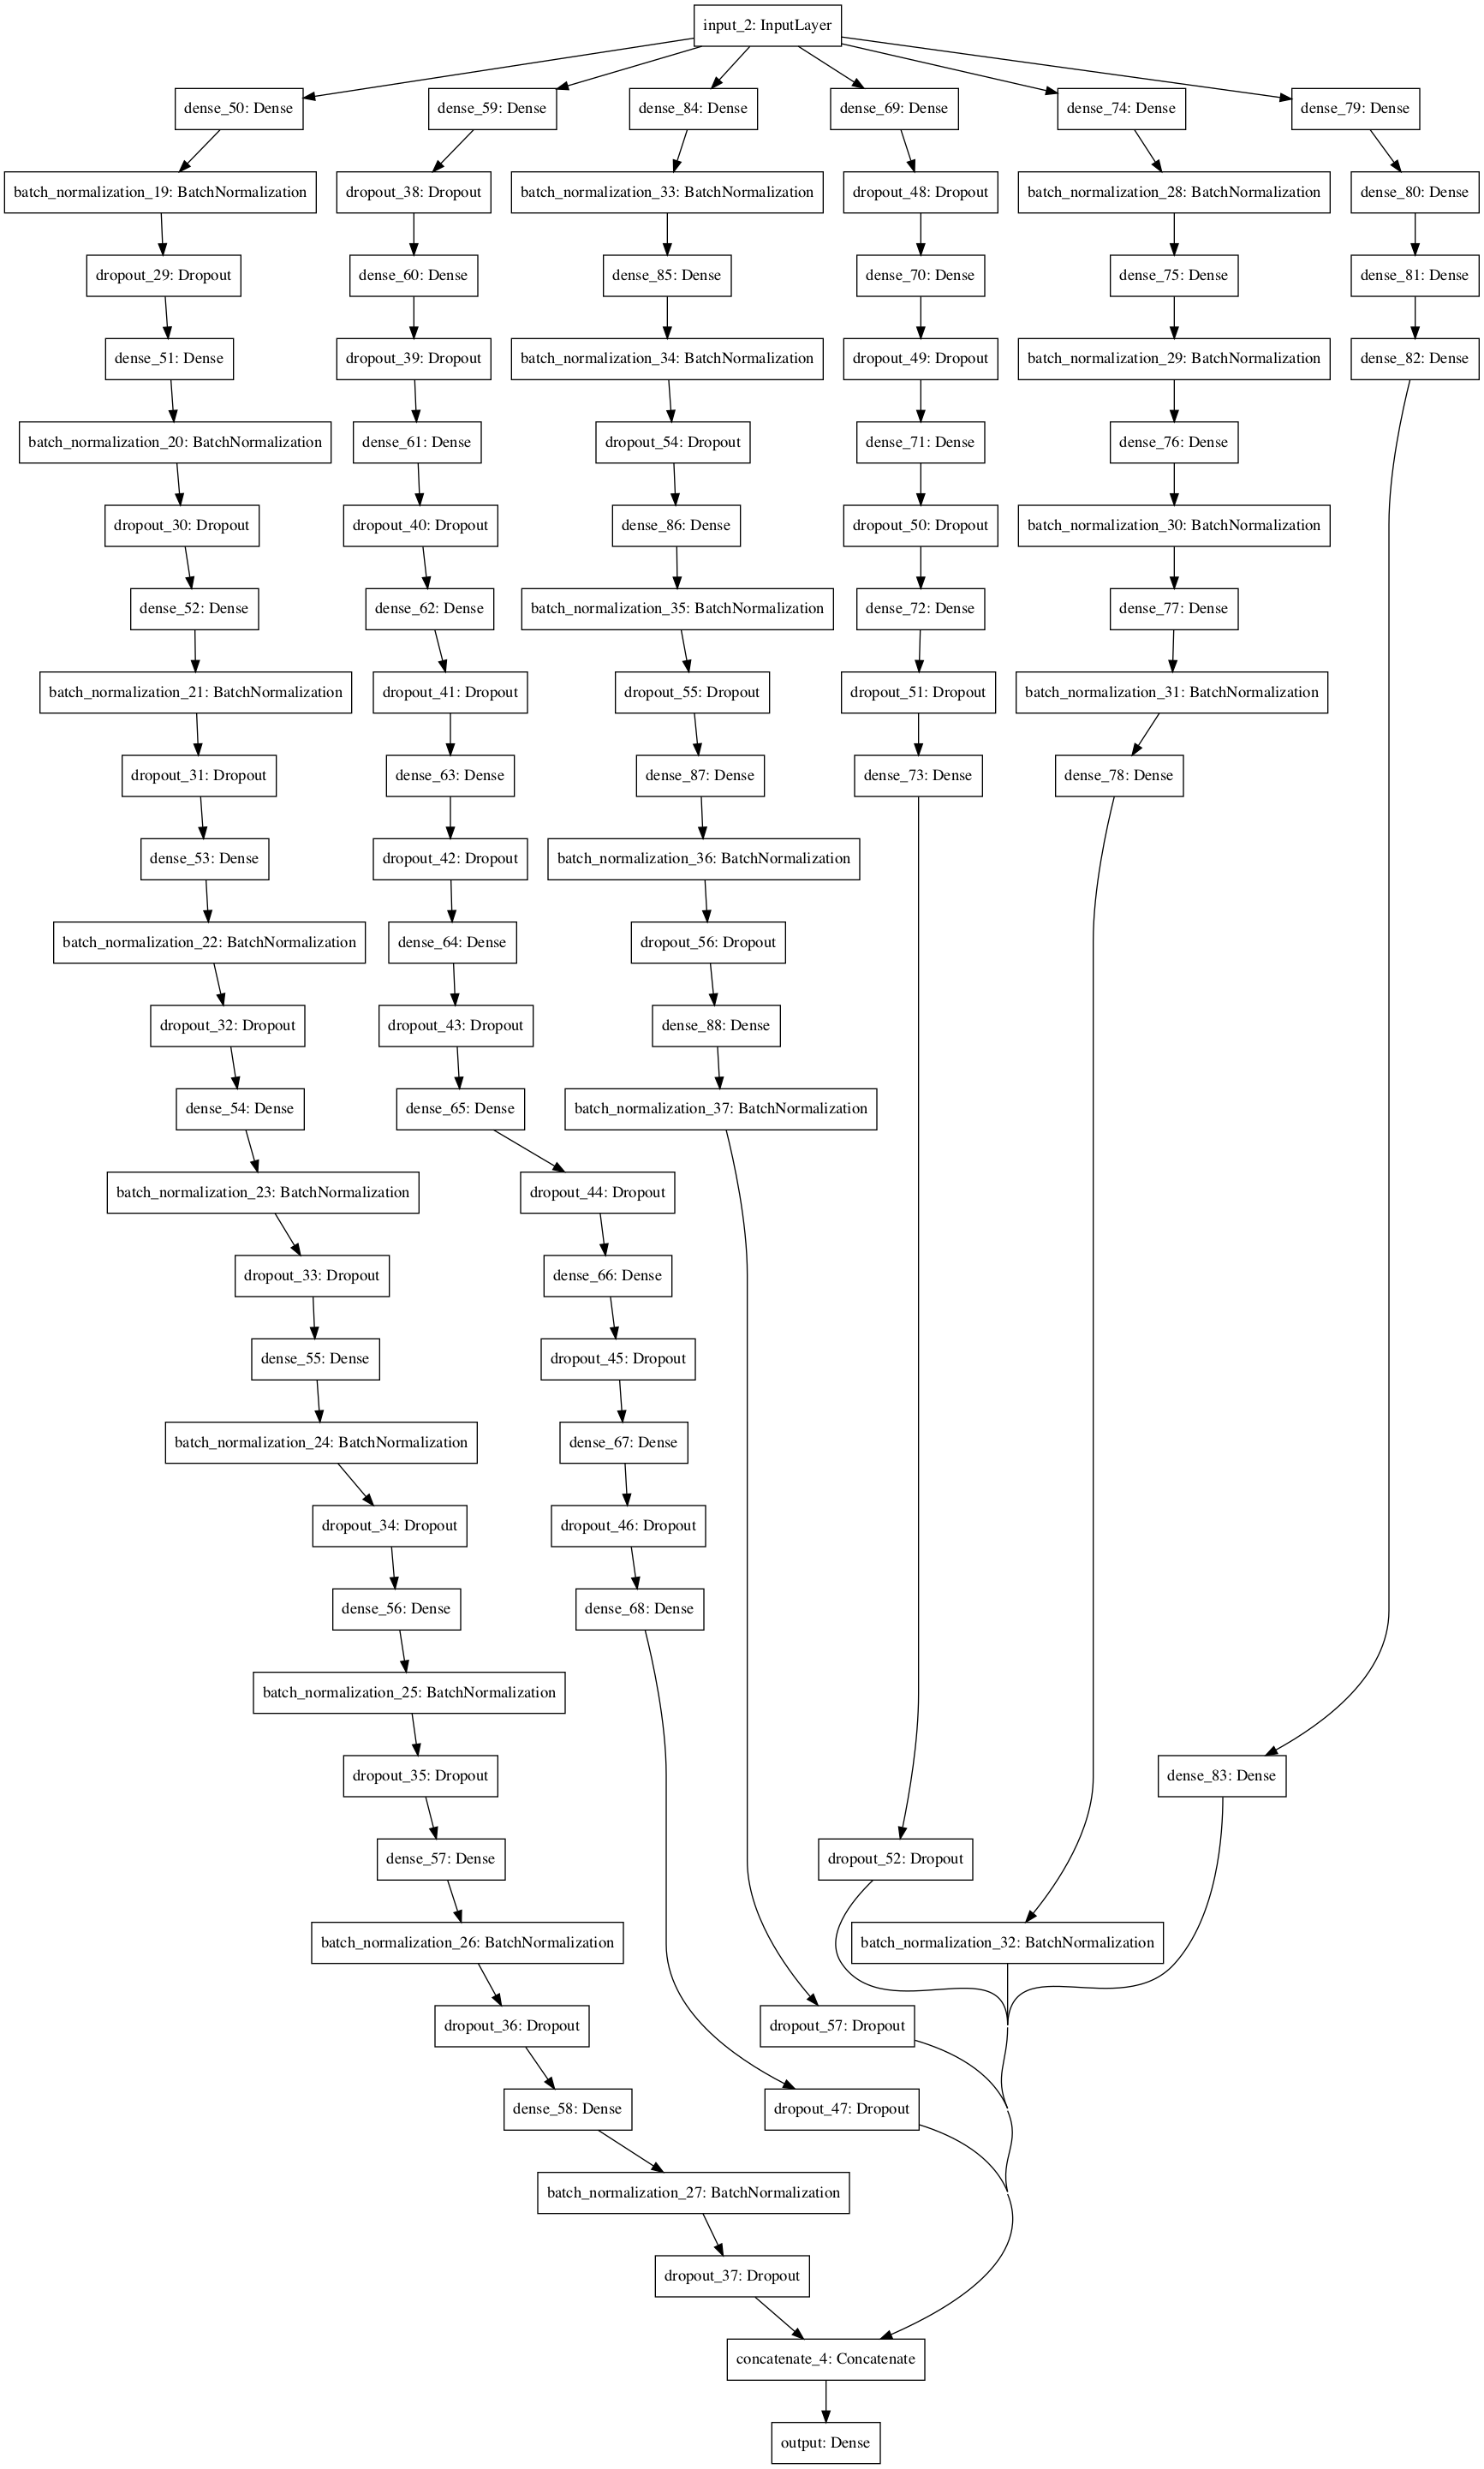

In [40]:
# Model_6e

input = Input(shape = (6,))

# ANN SUBMODEL A
hidden_1 = Dense(64, activation='relu')(input)
bach_norm =  BatchNormalization()(hidden_1)
dropout =  Dropout(rate=0.1)(bach_norm)

hidden_2 = Dense(128, activation='relu')(dropout)
bach_norm =  BatchNormalization()(hidden_2)
dropout =  Dropout(rate=0.2)(bach_norm)

hidden_3 = Dense(256, activation='relu')(dropout)
bach_norm =  BatchNormalization()(hidden_3)
dropout =  Dropout(rate=0.3)(bach_norm)

hidden_4 = Dense(512, activation='relu')(dropout)
bach_norm =  BatchNormalization()(hidden_4)
dropout =  Dropout(rate=0.4)(bach_norm)

hidden_5 = Dense(1024, activation='relu')(dropout)
bach_norm =  BatchNormalization()(hidden_5)
dropout =  Dropout(rate=0.5)(bach_norm)

hidden_6 = Dense(512, activation='relu')(dropout)
bach_norm =  BatchNormalization()(hidden_6)
dropout =  Dropout(rate=0.4)(bach_norm)

hidden_7 = Dense(256, activation='relu')(dropout)
bach_norm =  BatchNormalization()(hidden_7)
dropout =  Dropout(rate=0.3)(bach_norm)

hidden_8 = Dense(128, activation='relu')(dropout)
bach_norm =  BatchNormalization()(hidden_8)
dropout =  Dropout(rate=0.2)(bach_norm)

hidden_9 = Dense(64, activation='relu')(dropout)
bach_norm =  BatchNormalization()(hidden_9)
out_submodel_a =  Dropout(rate=0.1)(bach_norm)


# ANN SUBMODEL B
from functools import partial
RegularizedDense = partial(tf.keras.layers.Dense,
                           activation="relu",
                           kernel_initializer="he_normal",
                           kernel_constraint=tf.keras.constraints.max_norm(1.),
                           kernel_regularizer=tf.keras.regularizers.l1_l2(0.01))

hidden_1 =  RegularizedDense(64)(input)
dropout =  Dropout(rate=0.1)(hidden_1)

hidden_2 =  RegularizedDense(128)(dropout )
dropout =  Dropout(rate=0.2)(hidden_2)

hidden_3 =  RegularizedDense(256)(dropout )
dropout =  Dropout(rate=0.3)(hidden_3)

hidden_4 =  RegularizedDense(256)(dropout )
dropout =  Dropout(rate=0.3)(hidden_4)

hidden_5 =  RegularizedDense(512)(dropout )
dropout =  Dropout(rate=0.4)(hidden_5)

hidden_6 =  RegularizedDense(512)(dropout )
dropout =  Dropout(rate=0.4)(hidden_6)

hidden_7 =  RegularizedDense(256)(dropout )
dropout =  Dropout(rate=0.3)(hidden_7)

hidden_8 =  RegularizedDense(256)(dropout )
dropout =  Dropout(rate=0.3)(hidden_8)

hidden_9 =  RegularizedDense(128)(dropout )
dropout =  Dropout(rate=0.2)(hidden_9)

hidden_10 =  RegularizedDense(64)(dropout )
out_submodel_b =  Dropout(rate=0.1)(hidden_10)

# ANN SUBMODEL C
hidden_1 = Dense(64, activation='relu')(input)
dropout =  Dropout(rate=0.1)(hidden_1)

hidden_2 = Dense(128, activation='relu')(dropout)
dropout =  Dropout(rate=0.2)(hidden_2)

hidden_3 = Dense(256, activation='relu')(dropout)
dropout =  Dropout(rate=0.3)(hidden_3)

hidden_4 = Dense(128, activation='relu')(dropout)
dropout =  Dropout(rate=0.2)(hidden_4)

hidden_5 = Dense(64, activation='relu')(dropout)
out_submodel_c =  Dropout(rate=0.1)(hidden_5)

# ANN SUBMODEL D
hidden_1 = Dense(64, activation='relu')(input)
bach_norm =  BatchNormalization()(hidden_1)

hidden_2 = Dense(128, activation='relu')(bach_norm)
bach_norm =  BatchNormalization()(hidden_2)

hidden_3 = Dense(256, activation='relu')(bach_norm)
bach_norm =  BatchNormalization()(hidden_3)

hidden_4 = Dense(128, activation='relu')(bach_norm)
bach_norm =  BatchNormalization()(hidden_4)

hidden_5 = Dense(64, activation='relu')(bach_norm)
out_submodel_d =  BatchNormalization()(hidden_5)

# ANN SUBMODEL E
from functools import partial
RegularizedDense = partial(tf.keras.layers.Dense,
                           activation="relu",
                           kernel_initializer="he_normal",
                           kernel_constraint=tf.keras.constraints.max_norm(1.))

hidden_1 =  RegularizedDense(64)(input)
hidden_2 =  RegularizedDense(128)(hidden_1)
hidden_3 =  RegularizedDense(256)(hidden_2)
hidden_4 =  RegularizedDense(128)(hidden_3)
out_submodel_e =  RegularizedDense(64)(hidden_4)

# ANN SUBMODEL F
from functools import partial
RegularizedDense = partial(tf.keras.layers.Dense,
                           activation="relu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=tf.keras.regularizers.l1_l2(0.01))

hidden_1 =  RegularizedDense(64)(input)
bach_norm =  BatchNormalization()(hidden_1)
dropout =  Dropout(rate=0.1)(bach_norm)

hidden_2 =  RegularizedDense(128)(bach_norm)
bach_norm =  BatchNormalization()(hidden_2)
dropout =  Dropout(rate=0.1)(bach_norm)

hidden_3 =  RegularizedDense(256)(dropout)
bach_norm =  BatchNormalization()(hidden_3)
dropout =  Dropout(rate=0.1)(bach_norm)

hidden_4 =  RegularizedDense(128)(dropout)
bach_norm =  BatchNormalization()(hidden_4)
dropout =  Dropout(rate=0.1)(bach_norm)


hidden_5 =  RegularizedDense(64)(dropout)
bach_norm =  BatchNormalization()(hidden_5)
out_submodel_f =  Dropout(rate=0.1)(bach_norm)


concat = Concatenate()([out_submodel_a, out_submodel_b, out_submodel_c, out_submodel_d, out_submodel_e, out_submodel_f])

output = Dense(1, activation='linear', name="output")(concat)
model_6e = Model(inputs=[input], outputs=[output])

model_6e.compile(optimizer='SGD',
                 loss='mse',
                 metrics=['mae'])

model_6e.summary()

tf.keras.utils.plot_model(model_6e)


In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("model_6e.h5",
                                                   save_best_only=True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)

history_6e = model_6e.fit(X_train_norm, y_train,
                       epochs=200,
                       batch_size=128,
                       verbose=2,
                       validation_split=0.2,
                       callbacks =[checkpoint_cb, early_stopping_cb])

Epoch 1/200


2021-09-03 18:58:13.660670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-09-03 18:58:37.753985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


299/299 - 27s - loss: 324.2234 - mae: 0.2403 - val_loss: 216.3989 - val_mae: 0.5120
Epoch 2/200
299/299 - 25s - loss: 145.6071 - mae: 0.1135 - val_loss: 90.1717 - val_mae: 0.2026
Epoch 3/200
299/299 - 25s - loss: 58.7959 - mae: 0.0978 - val_loss: 35.9382 - val_mae: 0.0600
Epoch 4/200
299/299 - 25s - loss: 24.3015 - mae: 0.0907 - val_loss: 15.7240 - val_mae: 0.0474
Epoch 5/200
299/299 - 25s - loss: 11.2487 - mae: 0.0932 - val_loss: 7.7190 - val_mae: 0.0474
Epoch 6/200
299/299 - 25s - loss: 5.6477 - mae: 0.0885 - val_loss: 4.0348 - val_mae: 0.0461
Epoch 7/200
299/299 - 25s - loss: 3.0803 - mae: 0.0852 - val_loss: 2.3263 - val_mae: 0.0375
Epoch 8/200
299/299 - 25s - loss: 1.9355 - mae: 0.0813 - val_loss: 1.6224 - val_mae: 0.0364
Epoch 9/200
299/299 - 25s - loss: 1.4232 - mae: 0.0810 - val_loss: 1.2371 - val_mae: 0.0384
Epoch 10/200
299/299 - 25s - loss: 1.1239 - mae: 0.0774 - val_loss: 1.0147 - val_mae: 0.0366
Epoch 11/200
299/299 - 24s - loss: 0.9444 - mae: 0.0759 - val_loss: 0.8633 - va

#### Оценка результатов

In [ ]:
# Learning curves
pd.DataFrame(history_6e.history).plot(figsize=(20, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(20, 8))
axL.plot(history_6e.history['loss'], label="loss (mse) for training")
axL.plot(history_6e.history['val_loss'], label="loss (mse) for validation")
axL.set_title('model loss')
axL.set_xlabel('epoch')
axL.set_ylabel('loss')
axL.legend(loc='upper right')

axR.plot(history_6e.history['mae'], label="mae for training")
axR.plot(history_6e.history['val_mae'], label="mae for validation")
axR.set_title('model mae')
axR.set_xlabel('epoch')
axR.set_ylabel('mae')
axR.legend(loc='upper right')

plt.show()

In [ ]:
# Evaluate the model on the test set
evaluate_6e = model_6e.evaluate(X_test, y_test, verbose=2)

In [ ]:
# Predictions
y_preds_train = model_6e.predict(X_train)
y_preds_test = model_6e.predict(X_test)

# calculate root mean squared error
trainScore_6e = math.sqrt(mean_squared_error(y_train, y_preds_train))
print('Train Score: %.2f RMSE' % (trainScore_6e))

testScore_6e = math.sqrt(mean_squared_error(y_test, y_preds_test))
print('Test Score: %.2f RMSE' % (testScore_6e))

---

### Сопоставление результатов

In [ ]:
model_results = [["model_6a", trainScore_6a, testScore_6a, evaluate_6a[0], evaluate_6a[1]],
                 ["model_6b", trainScore_6b, testScore_6b, evaluate_6b[0], evaluate_6b[1]],
                 ["model_6c", trainScore_6c, testScore_6c, evaluate_6c[0], evaluate_6c[1]],
                 ["model_6d", trainScore_6d, testScore_6d, evaluate_6d[0], evaluate_6d[1]],
                 ["model_6e", trainScore_6e, testScore_6e, evaluate_6e[0], evaluate_6e[1]]]

In [ ]:
all_results = pd.DataFrame(model_results, columns=["model", "Train Score RMSE", "Test score RMSE", "Loss", "MAE"])
all_results

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 8))
all_results[["Train Score RMSE", "Test score RMSE", "MAE"]].plot(ax=ax[0], kind='bar')
all_results[["Loss"]].plot(ax=ax[1], kind='bar')
plt.show()